## Жозеф Веншенесс 23.м08

## Задания:
- Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте kaggle, UCI репозитория, Google Dataset Search и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения. (Выполнено)
- Считать данные и вывести их основные характеристики, описание признаков. (Выполнено)
- Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным. (Выполнено)
- *(+2 балла) Произвести чистку данных (Data Cleaning). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи. (Выполнено)
- Провести анализ признаков, используя визуализацию (hist(), boxplot(), countplot(), barplot() и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания. (Выполнено)
- *(+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции). (Выполнено)
- *(+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (Feature Engineering). (Выполнено)

In [30]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import  matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


__Описание данных:__

- **Pregnancies** - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- **Glucose** - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- **BloodPressure** - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.-
- **SkinThickness** - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- **Insulin** - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- **BMI** - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- **DiabetesPedigreeFunction** - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- **Age** - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- **Class** - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

Проверяем наличие пропусков

In [74]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

Признаки Glucose, BloodPressure, SkinThickness, Insulin и BMI имеют пропусков. Но Признаки Glucose и BMI имеют мало пропусков

Будем считать целевую признаку "Class". Интересно предсказать наличие диабета у субъекта

In [75]:
df["Class"].value_counts()

0    500
1    268
Name: Class, dtype: int64

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


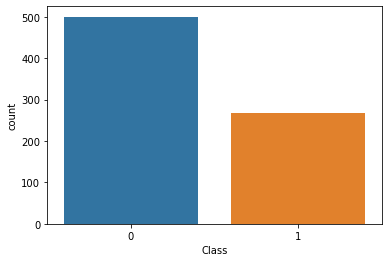

In [76]:
sns.countplot('Class', data=df);

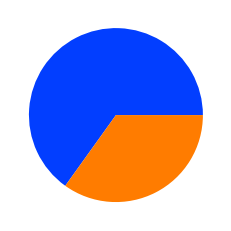

In [77]:
colors = sns.color_palette('bright')[:2]
plt.pie(df['Class'].value_counts(), colors=colors)
plt.show()

Вычисляем основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов

In [78]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


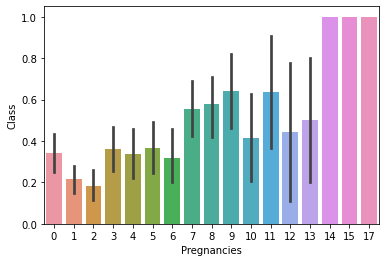

In [79]:
sns.barplot(x = "Pregnancies", y = "Class", data = df);

<AxesSubplot:xlabel='Pregnancies'>

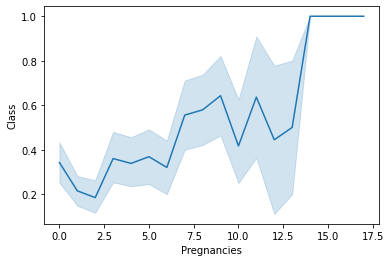

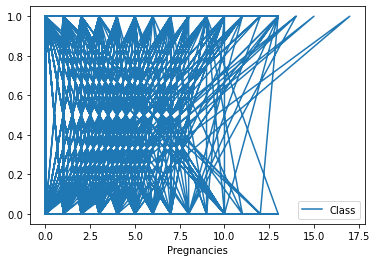

In [80]:
dt = df.groupby('Pregnancies').sum()
dt = df.reset_index()
sns.lineplot(data=df, x=dt.Pregnancies, y=df.Class)
df.plot( x='Pregnancies', y='Class')

Добавим новый призрак "WasPregnant"

In [81]:
df['WasPregnant'] = (df['Pregnancies'] > 0).astype('int')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,WasPregnant
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,1
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1,1


<AxesSubplot:xlabel='Class', ylabel='Age'>

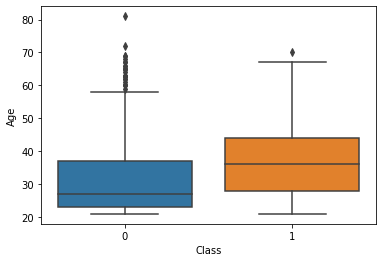

In [82]:
sns.boxplot(data=df, x="Class", y="Age")

In [ ]:
Риск заболеть диабетом увеличивается с возрастом

Очистим данных. Сначала Glucose. BloodPressure и BMI так у них мало пропусков

In [83]:
df = df.fillna({"Glucose":df['Glucose'].median(), "BloodPressure":df['BloodPressure'].median(), "BMI": df['BMI'].mean()})
print (df.Glucose.isnull().any())
print (df.BMI.isnull().any())
print (df.BloodPressure.isnull().any())

False
False
False


Заполняем пропусков в Insulin. Сначала считаем средное значение исулин для женжин у которых обнаружен диабет потом у которых не обнаружен

In [84]:
mean_i=df.loc[df['Class'] == 1, 'Insulin'].mean()
mean_i1=df.loc[df['Class'] == 0, 'Insulin'].mean()
print(mean_i)
print(mean_i1)

206.84615384615384
130.28787878787878


In [85]:
df.loc[(df['Insulin'].isnull()) & (df['Class'] == 1), 'Insulin'] = mean_i
df.loc[(df['Insulin'].isnull()) & (df['Class'] == 0), 'Insulin'] = mean_i1
df.Insulin.isnull().any()

False

Заполняем пропусков в SkinThickness. Сначала проверяем отношение между признаками "BMI" и "Thickness"

Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

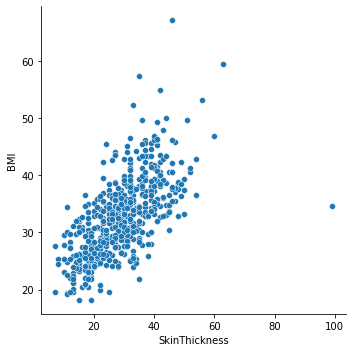

In [86]:
sns.relplot(data=df, x="SkinThickness", y="BMI")

Можно сказать чем высшее значение "BMI" тем высшее значение "Thickness"  

In [87]:

condlist = [df['BMI']<18.5, (df['BMI'] >= 18.5) & (df['BMI']<24.9), (df['BMI'] >= 25) & (df['BMI']<=29.9)]
choicelist = ['Underweight', 'Normal weight', 'Overweight']

df['bodyType'] = np.select(condlist, choicelist, 'Obesity')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,WasPregnant,bodyType
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,1,Overweight
2,8,183.0,64.0,NaN,206.846154,23.3,0.672,32,1,1,Normal weight
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,0,Obesity


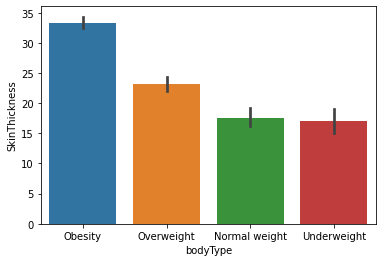

In [88]:
sns.barplot(x = "bodyType", y = "SkinThickness", data = df);

In [89]:
df.groupby('bodyType')['SkinThickness'].mean()

bodyType
Normal weight    17.600000
Obesity          33.332386
Overweight       23.220472
Underweight      17.000000
Name: SkinThickness, dtype: float64

In [90]:
df.loc[(df['SkinThickness'].isnull()) & (df['bodyType'] == 'Normal weight'), 'SkinThickness'] = 17.60
df.loc[(df['SkinThickness'].isnull()) & (df['bodyType'] == 'Obesity'), 'SkinThickness'] = 33.33
df.loc[(df['SkinThickness'].isnull()) & (df['bodyType'] == 'Overweight'), 'SkinThickness'] = 23.22
df.loc[(df['SkinThickness'].isnull()) & (df['bodyType'] == 'Underweight'), 'SkinThickness'] = 17.00
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,WasPregnant,bodyType
0,6,148.0,72.0,35.00,206.846154,33.600000,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.00,130.287879,26.600000,0.351,31,0,1,Overweight
2,8,183.0,64.0,17.60,206.846154,23.300000,0.672,32,1,1,Normal weight
3,1,89.0,66.0,23.00,94.000000,28.100000,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.00,168.000000,43.100000,2.288,33,1,0,Obesity
5,5,116.0,74.0,23.22,130.287879,25.600000,0.201,30,0,1,Overweight
6,3,78.0,50.0,32.00,88.000000,31.000000,0.248,26,1,1,Obesity
7,10,115.0,72.0,33.33,130.287879,35.300000,0.134,29,0,1,Obesity
8,2,197.0,70.0,45.00,543.000000,30.500000,0.158,53,1,1,Obesity
9,8,125.0,96.0,33.33,206.846154,32.457464,0.232,54,1,1,Obesity


In [91]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
WasPregnant                 0
bodyType                    0
dtype: int64

<AxesSubplot:xlabel='bodyType', ylabel='Age'>

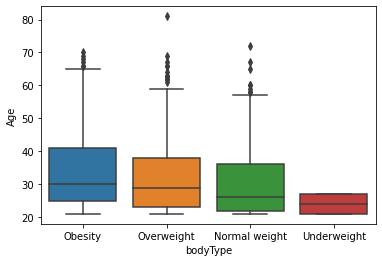

In [92]:
sns.boxplot(data=df, x="bodyType", y="Age")

<AxesSubplot:xlabel='bodyType', ylabel='Pregnancies'>

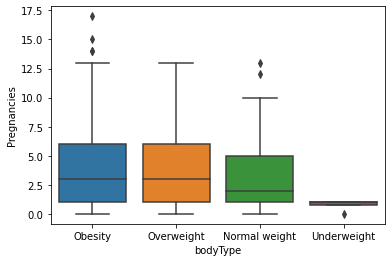

In [93]:
sns.boxplot(data=df, x="bodyType", y="Pregnancies")

Женщины, у которых было более 5 беременностей, чаще всего имеют избыточный вес или страдают ожирением

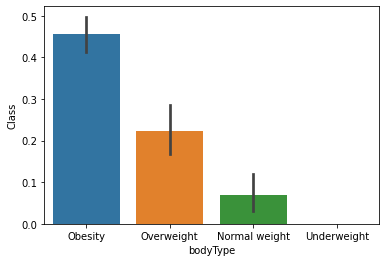

In [94]:
sns.barplot(x = "bodyType", y = "Class", data = df);

Чем толще человек, тем больше у него шансов заболеть диабетом

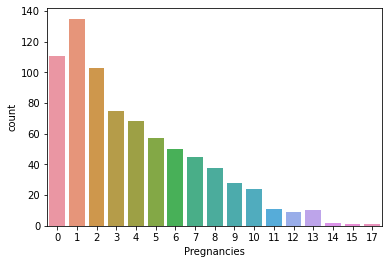

In [95]:
sns.countplot(x ='Pregnancies', data = df)
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Obesity'),
  Text(1, 0, 'Overweight'),
  Text(2, 0, 'Normal weight'),
  Text(3, 0, 'Underweight')])

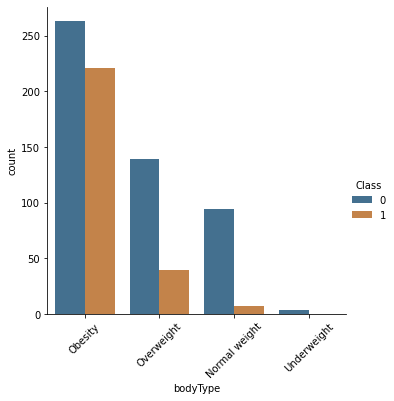

In [96]:
sns.catplot(data = df,hue = 'Class', x = 'bodyType',
            kind='count', saturation=0.5) 
plt.xticks(rotation=45)

In [97]:
df['bodyType'].replace(['Underweight', 'Normal weight', 'Overweight', 'Obesity'], [0, 1, 2, 3], inplace=True)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,WasPregnant,bodyType
0,6,148.0,72.0,35.00,206.846154,33.600000,0.627,50,1,1,3
1,1,85.0,66.0,29.00,130.287879,26.600000,0.351,31,0,1,2
2,8,183.0,64.0,17.60,206.846154,23.300000,0.672,32,1,1,1
3,1,89.0,66.0,23.00,94.000000,28.100000,0.167,21,0,1,2
4,0,137.0,40.0,35.00,168.000000,43.100000,2.288,33,1,0,3
5,5,116.0,74.0,23.22,130.287879,25.600000,0.201,30,0,1,2
6,3,78.0,50.0,32.00,88.000000,31.000000,0.248,26,1,1,3
7,10,115.0,72.0,33.33,130.287879,35.300000,0.134,29,0,1,3
8,2,197.0,70.0,45.00,543.000000,30.500000,0.158,53,1,1,3
9,8,125.0,96.0,33.33,206.846154,32.457464,0.232,54,1,1,3


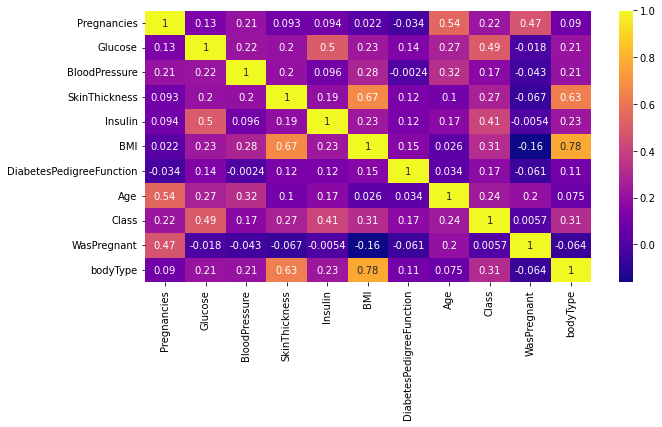

In [98]:
sns.heatmap(df.corr(), annot=True, cmap='plasma')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [99]:
df=df.drop(columns=["BMI"])

In [100]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Class,WasPregnant,bodyType
0,6,148.0,72.0,35.00,206.846154,0.627,50,1,1,3
1,1,85.0,66.0,29.00,130.287879,0.351,31,0,1,2
2,8,183.0,64.0,17.60,206.846154,0.672,32,1,1,1
3,1,89.0,66.0,23.00,94.000000,0.167,21,0,1,2
4,0,137.0,40.0,35.00,168.000000,2.288,33,1,0,3
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.000000,0.171,63,0,1,3
764,2,122.0,70.0,27.00,130.287879,0.340,27,0,1,3
765,5,121.0,72.0,23.00,112.000000,0.245,30,0,1,2
766,1,126.0,60.0,33.33,206.846154,0.349,47,1,1,3
